This file was done by Raissa Rae Makonga - r0917910

# [Kaggle Titanic Dataset Link](https://www.kaggle.com/competitions/titanic/overview)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the data from the kaggle competition

In [2]:
train = pd.read_csv('data/train/train.csv')
test = pd.read_csv('data/test/test.csv')

### Cleaning the data

Cleaning the data as requsted in the Github.

In [48]:
#rename 
train.columns = train.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')

Checking train data to see if theres an values and cleaning it up.

In [50]:
#checking for mising values in the train
train.isnull().sum()


passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [52]:
#dropping column - not needed.
train.drop('cabin', axis=1, inplace=True)

In [53]:
#a lot of ages missing so finding the median so it is not blank
train['age'].fillna(train['age'].median(), inplace=True)

Checking test data to see if theres an values and cleaning it up.

In [54]:
test.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

The next cell is in comments because it was ran twice and gave an error because the column was already dropped from the first time it ran.

In [ ]:
#test.drop('cabin', axis=1, inplace=True)

In [58]:
#median for the ages as well
test['age'].fillna(test['age'].median(), inplace=True)

Creating new dataframes for numerical and categorical, the separation is helpful for performing different analysis

In [61]:
train_num = train[['age','sibsp','parch','fare']]
train_cat = train[['survived','pclass','sex','ticket','embarked']]

### EDA

Showing the distributions for all the numeric variables

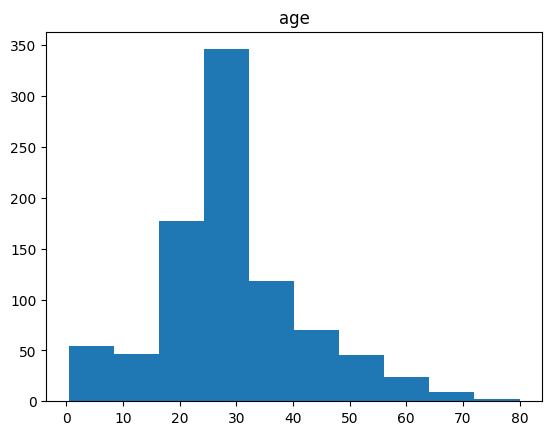

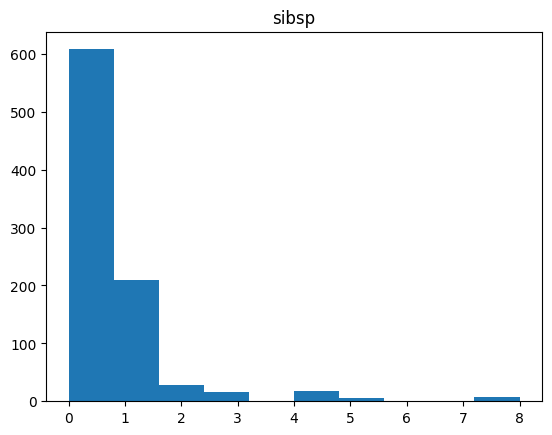

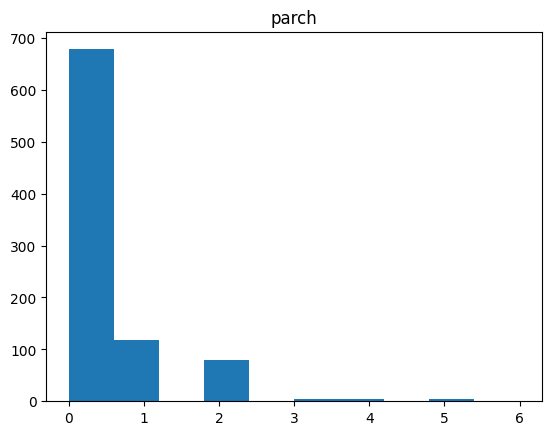

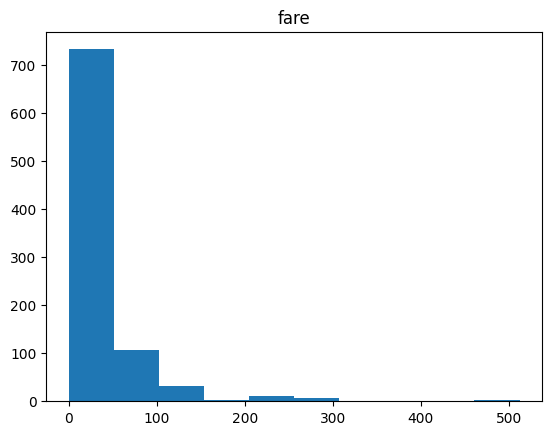

In [ ]:
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

Showing the average values for the values for each of the survival group.

In [29]:
pd.pivot_table(train, index = 'survived', values = ['age','sibsp','parch','fare'])

,age,fare,parch,sibsp
survived,,,,
0,30.028233,22.117887,0.329690,0.553734
1,28.291433,48.395408,0.464912,0.473684


The Fare distribution is heavily skewed to the right, with many fares being low but a few very high fares.
The Age distribution is somewhat skewed to the right, with a few older passengers.

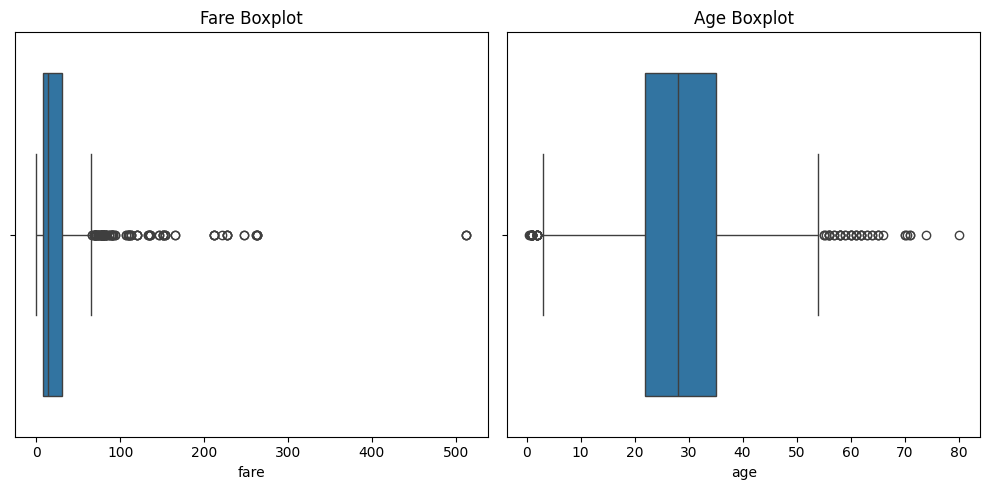

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=train['fare'])
plt.title('Fare Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(x=train['age'])
plt.title('Age Boxplot')

plt.tight_layout()
plt.show()

Checking to see the number of outliers in Fare and Age and decided to cap them, i thought they were still valid.

In [31]:
# Calculate IQR for 'Fare' and 'Age'
Q1_fare = train['fare'].quantile(0.25)
Q3_fare = train['fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

Q1_age = train['age'].quantile(0.25)
Q3_age = train['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define outlier thresholds for Fare and Age
fare_lower_bound = Q1_fare - 1.5 * IQR_fare
fare_upper_bound = Q3_fare + 1.5 * IQR_fare

age_lower_bound = Q1_age - 1.5 * IQR_age
age_upper_bound = Q3_age + 1.5 * IQR_age

# Check for outliers
outliers_fare = train[(train['fare'] < fare_lower_bound) | (train['fare'] > fare_upper_bound)]
outliers_age = train[(train['age'] < age_lower_bound) | (train['age'] > age_upper_bound)]

print("Number of Fare outliers:", len(outliers_fare))
print("Number of Age outliers:", len(outliers_age))

Number of Fare outliers: 116
Number of Age outliers: 66


In [32]:
# Capping outliers for 'Fare' and 'Age' at the 1st and 99th percentiles
fare_cap_low = train['fare'].quantile(0.01)
fare_cap_high = train['fare'].quantile(0.99)
train['fare'] = train['fare'].clip(lower=fare_cap_low, upper=fare_cap_high)

age_cap_low = train['age'].quantile(0.01)
age_cap_high = train['age'].quantile(0.99)
train['age'] = train['age'].clip(lower=age_cap_low, upper=age_cap_high)


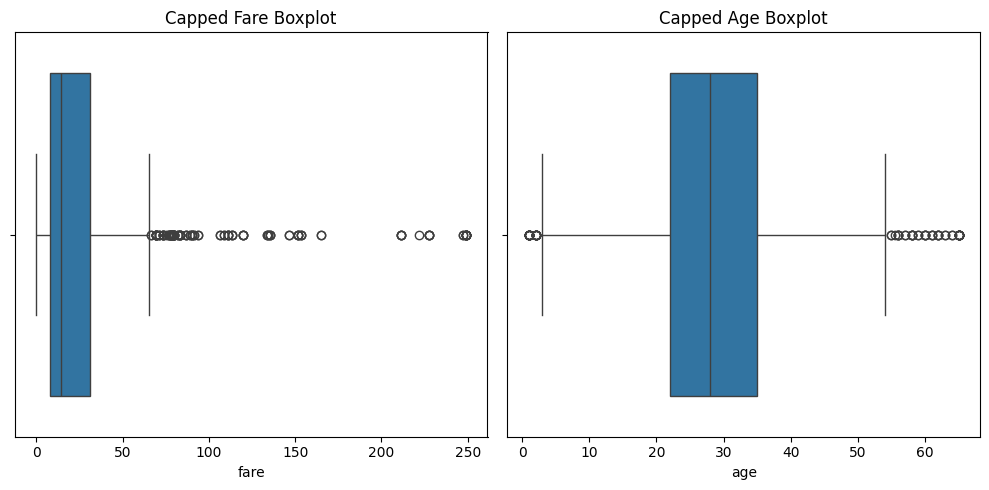

In [33]:
# Plot boxplots for capped 'Fare' and 'Age'
plt.figure(figsize=(10, 5))

# Boxplot for capped 'Fare'
plt.subplot(1, 2, 1)
sns.boxplot(x=train['fare'])
plt.title('Capped Fare Boxplot')

# Boxplot for capped 'Age'
plt.subplot(1, 2, 2)
sns.boxplot(x=train['age'])
plt.title('Capped Age Boxplot')

plt.tight_layout()
plt.show()

converting pclass into a categorical data type, in an order of 1,2 and 3. which defines the order, '1' is the highest class, followed by '2' and '3'.
AsType is does the same but without an order.

In [34]:
# Convert Pclass into an ordered categorical feature
train['pclass'] = pd.Categorical(train['pclass'], categories=[1, 2, 3], ordered=True)

# Convert Sex and Embarked into categorical types (unordered)
train['sex'] = train['sex'].astype('category')
train['embarked'] = train['embarked'].astype('category')

# Check the data types to confirm
print(train.dtypes)

passengerid       int64
survived          int64
pclass         category
name             object
sex            category
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked       category
dtype: object


visualizing the distribution of categorical variables

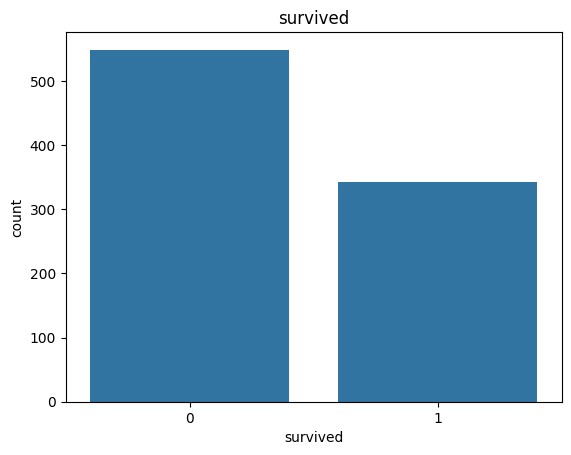

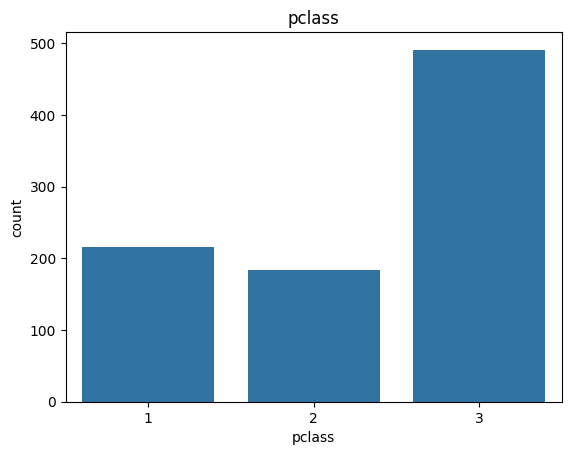

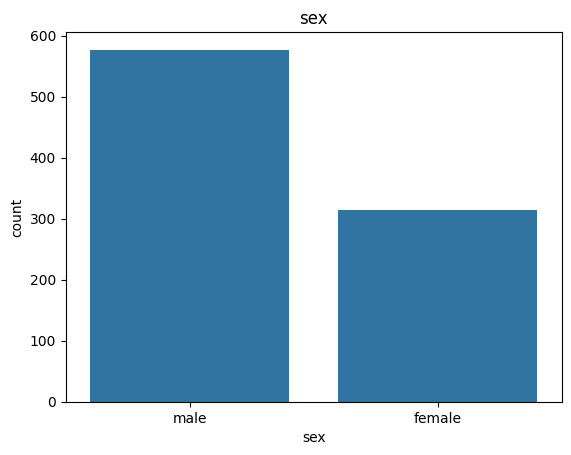

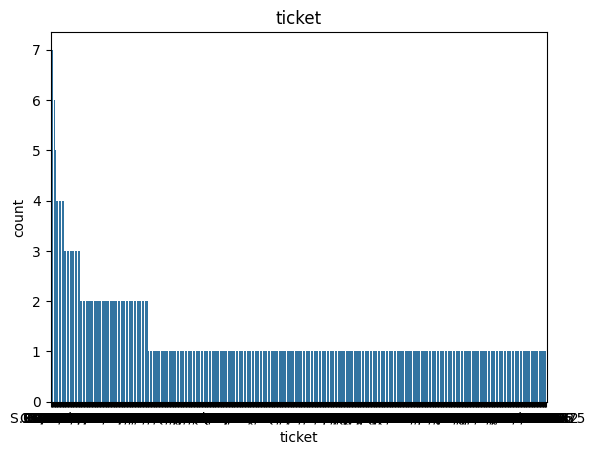

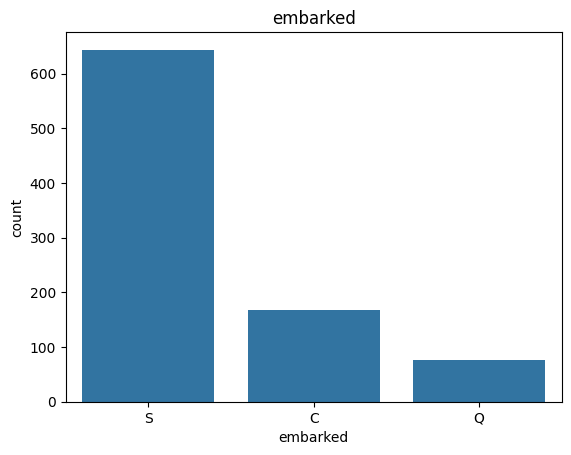

In [35]:
for i in train_cat.columns:
    sns.barplot(x=train_cat[i].value_counts().index, y=train_cat[i].value_counts()).set_title(i)
    plt.show()

pivot table to average count the number of tickets for each chosen column

In [36]:
print(pd.pivot_table(train, index = 'survived', columns = 'pclass', values = 'ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'survived', columns = 'sex', values = 'ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'survived', columns = 'embarked', values = 'ticket' ,aggfunc ='count'))

pclass      1   2    3
survived              
0          80  97  372
1         136  87  119

sex       female  male
survived              
0             81   468
1            233   109

embarked   C   Q    S
survived             
0         75  47  427
1         93  30  217


Boxplot for number of siblings/spouses abroad and the number of parent/children on board.

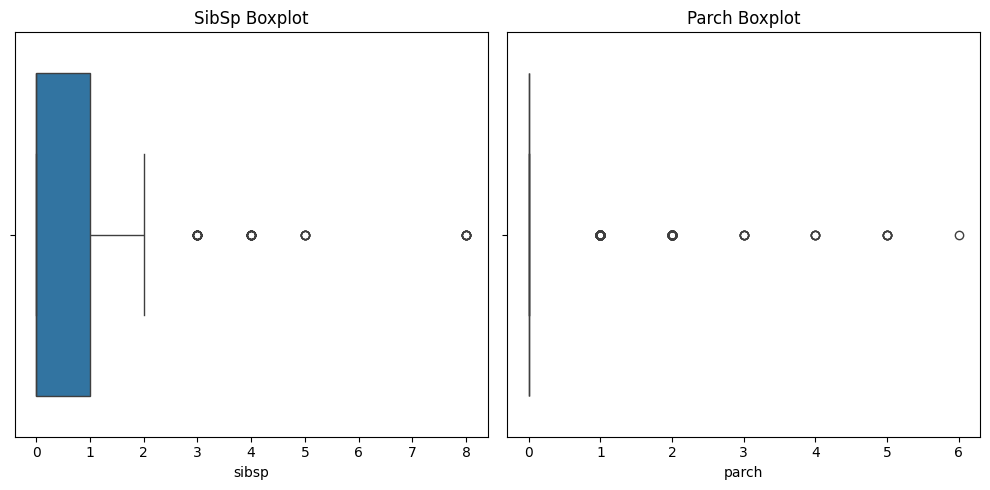

In [ ]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=train['sibsp'])
plt.title('SibSp Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(x=train['parch'])
plt.title('Parch Boxplot')

plt.tight_layout()
plt.show()


Comparing survival rates based on the number of sibilings/spouses and parent/children a passenger had on board.

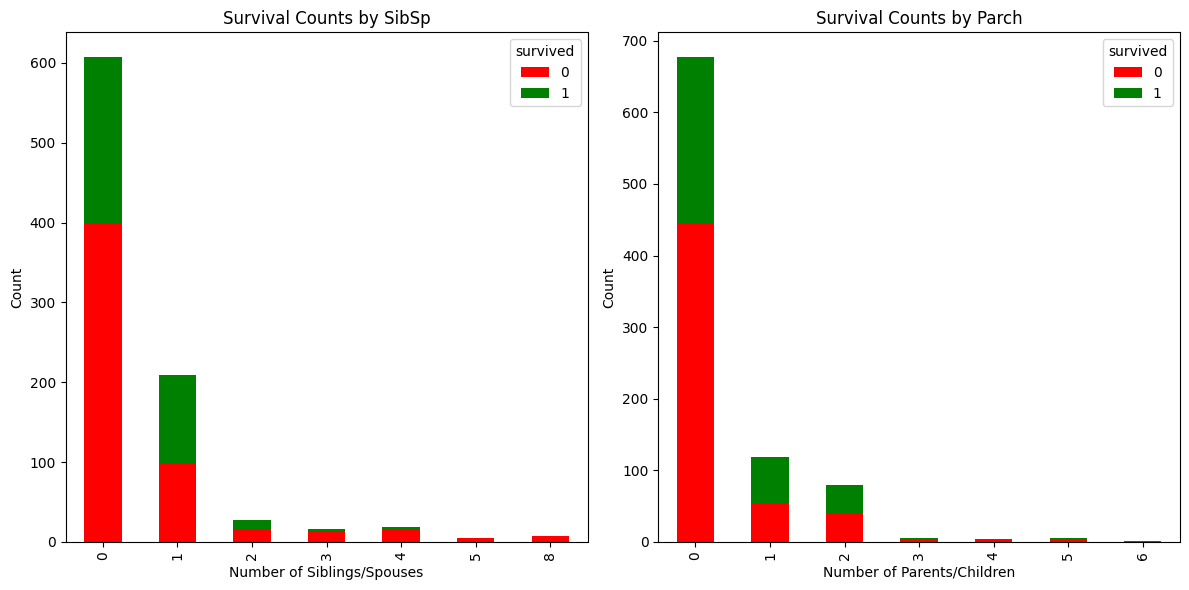

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Stacked Bar Plot for SibSp (Number of Siblings/Spouses Aboard)
sibsp_pivot = train.pivot_table(index='sibsp', columns='survived', aggfunc='size').fillna(0)
sibsp_pivot.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axes[0])  
axes[0].set_title('Survival Counts by SibSp')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Number of Siblings/Spouses')

# Stacked Bar Plot for Parch (Number of Parents/Children Aboard)
parch_pivot = train.pivot_table(index='parch', columns='survived', aggfunc='size').fillna(0)
parch_pivot.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axes[1]) 
axes[1].set_title('Survival Counts by Parch')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Number of Parents/Children')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()


Visualization that overlays the distribution of age for passengers who survived (green) and those who did not survive

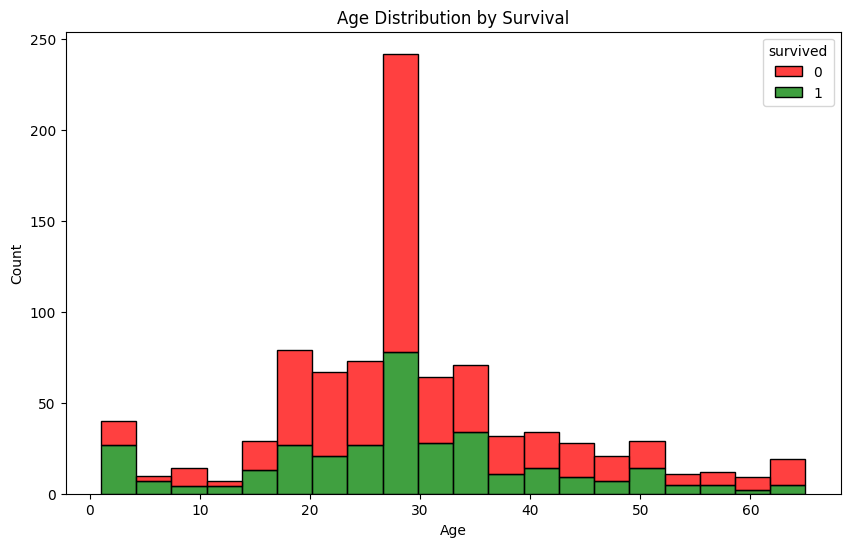

In [39]:
# Plotting the distribution of age and survival overlay
plt.figure(figsize=(10, 6))
sns.histplot(train, x='age', hue='survived', multiple='stack', bins=20, palette=['red', 'green'])
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Correlation matrix for the numeric features

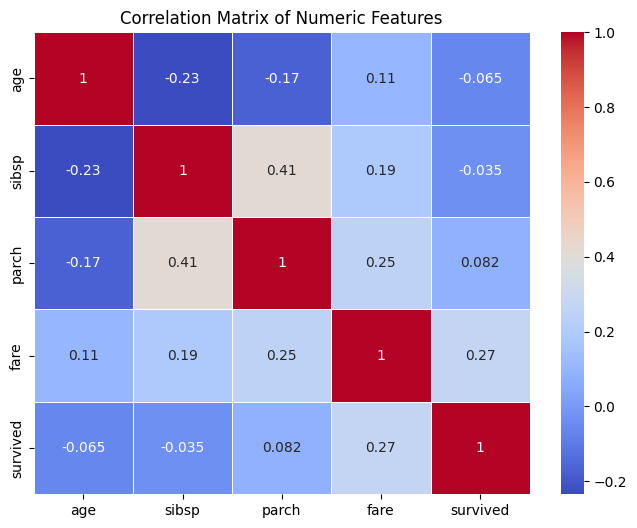

In [ ]:
corr_matrix = train[['age', 'sibsp', 'parch', 'fare', 'survived']].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


dropping the survived column

In [41]:
final_train_data = train.drop('survived', axis =1)

final_train_data

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
